In [14]:
from PIL import Image;
import numpy as np;
import operator
import matplotlib.pyplot as plt;
import random;
import math;
import statistics;
import time;

In [2]:
D = (255**2)*3;

def dist(PIX_A, PIX_B):
    d = (PIX_A[0] - PIX_B[0])**2 + (PIX_A[1] - PIX_B[1])**2 + (PIX_A[2] - PIX_B[2])**2;
    return math.sqrt(d/D);

In [3]:
random.seed(0)

In [4]:
TC = "005"

In [5]:
Folder = "002"

In [6]:
source_dir = "Source/"+Folder+"/" + TC + ".JPG"
source_image = Image.open(source_dir)
source_pix = source_image.load()

In [22]:
# test_dir = "Copy/"+Folder+"/" + TC + ".JPG"
# test_image = Image.open(test_dir)
# test_pix = test_image.load()
test_dir = "Vibrancy_Matrix_Experiments/exp9.jpg"
test_image = Image.open(test_dir)
# test_pix = test_image.load()


size = 256, 256
test_image.thumbnail(size)
test_image.save("outfile", "JPEG")
test_pix = test_image.load()

In [23]:
source_image.size, test_image.size

((578, 793), (256, 205))

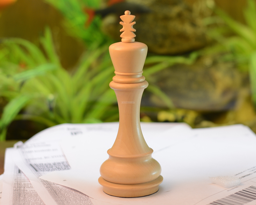

In [24]:
test_image

In [25]:
spread = 3;

X = time.time();

# matrix = np.zeros((test_image.size[0], test_image.size[1]))
start_points = []

for i in range(0, test_image.size[0], 1):
    for j in range(0, test_image.size[1], 1):
        dissimilarity = 0;
        ct = 0;
        for k in range(i-spread, i+spread+1, 1):
            for l in range(j-spread, j+spread+1, 1):
                if(k == i and j == l):
                    continue;
                if(k < 0 or k >= test_image.size[0] or l < 0 or l >= test_image.size[1]):
                    continue;
                dissimilarity += dist(test_pix[k, l], test_pix[i, j]);
        
#         Diss = dissimilarity/ct;
#         matrix[i][j] = dissimilarity * statistics.variance(test_pix[i, j]);
#         Diss = dissimilarity * statistics.variance(test_pix[i, j]);
        Diss = dissimilarity;
        Diss = round(Diss, 2)
        start_points.append([Diss, i, j]);

start_points = sorted(start_points, key = operator.itemgetter(0));
start_points.reverse()

Y = time.time();
print(Y - X)

4.912888050079346


In [26]:
start_points[0]

[19.07, 125, 12]

In [27]:
len(start_points)

52480

In [13]:
LMT = 0;
MARK_POINTS = math.floor((len(start_points)*10)/100)
print(MARK_POINTS)
for i in range(0, test_image.size[0], 1):
    for j in range(0, test_image.size[1], 1):
        test_pix[i, j] = (255, 255, 255)

for i in range(0, MARK_POINTS, 1):
    X = start_points[i][1];
    Y = start_points[i][2];
    for j in range(X-LMT, X+LMT+1, 1):
        for k in range(Y - LMT, Y + LMT+1, 1):
            if(j < 0 or j >= test_image.size[0] or k < 0 or k >= test_image.size[1]):
                continue;
            test_pix[j, k] = (0, 0, 0);

test_image.save("Vibrancy_Matrix_Experiments/W9.jpg")

5248


In [ ]:
# LMT = 100;
# x = np.arange(0, LMT, 1)
# y = [];
# for i in range(0, LMT, 1):
#     y.append(start_points[i][0])
# plt.plot(x, y)

In [ ]:
# start_points = start_points[:100]
# len(start_points)

In [ ]:
# fig = plt.figure(figsize = (10,10)) 
# plt.imshow( matrix , cmap = 'copper' , interpolation = 'nearest')
# plt.show()

In [ ]:
class Path:
    def __init__(self):
        self.points = [];
        self.score = [];
        self.agg_score = -1;

In [ ]:
def aggregate_score(scores):
    random.shuffle(scores);
    total_buckets = 100;
    max_bucket_size = len(scores)/total_buckets;
    buckets = [];
    curr_size = 0;
    curr_sum = 0;
    for sc in scores:
        curr_size += 1;
        curr_sum += sc;
        if(curr_size == max_bucket_size):
            buckets.append(curr_sum/curr_size);
            curr_sum = 0;
            curr_size = 0;
    if(curr_size > 0):
        buckets.append(curr_sum/curr_size);
    
    return statistics.median(buckets);

In [ ]:
ans = Path();
ans.agg_score = -1;

In [ ]:
MAX_STEP = math.floor(min(test_image.size[0], test_image.size[1])/10);
MAX_STEP = math.floor((test_image.size[0] + test_image.size[1])/20);

In [ ]:
MAX_STEP

In [ ]:
RANDOM_WALK_LEN = 5000;

In [ ]:
ITR_LIMIT = 10;

for START in range(0, ITR_LIMIT, 1):
    print("ITR: ", START+1);
    
    start_X = start_points[START][1];
    start_Y = start_points[START][2];

    v = []
    for i in range(0, source_image.size[0], 1):
        for j in range(0, source_image.size[1], 1):
            d = dist(test_pix[start_X, start_Y], source_pix[i,j]);
            v.append([d, i, j]);

    v = sorted(v, key = operator.itemgetter(0));
    v = v[:100]
    
    paths = [];
    for i in range(0, 100, 1):
        p = Path();
        p.points.append([v[i][1], v[i][2]]);
        p.score.append(v[i][0]);
        paths.append(p);
    
    curr_X = start_X;
    curr_Y = start_Y;

    for itr in range(0, RANDOM_WALK_LEN, 1):
        step_X = random.randint(1, MAX_STEP);
        step_Y = random.randint(1, MAX_STEP);
        
        off_X = random.randint(0, 1);
        off_Y = random.randint(0, 1);

        if(off_X == 0): off_X = -1;
        if(off_Y == 0): off_Y = -1;

        curr_X = curr_X + off_X * step_X;
        curr_Y = curr_Y + off_Y * step_Y;

        if(curr_X < 0 or curr_X >= test_image.size[0] or curr_Y < 0 or curr_Y >= test_image.size[1]):
            curr_X = curr_X - off_X * step_X;
            curr_Y = curr_Y - off_Y * step_Y;
            continue;

        img_RGB = test_pix[curr_X, curr_Y];

        for i in range(0, len(paths), 1):
            if(paths[i].score[-1] == -1):continue;
            last_X = paths[i].points[-1][0];
            last_Y = paths[i].points[-1][1];

            new_X = last_X + off_X * step_X;
            new_Y = last_Y + off_Y * step_Y;

            if(new_X < 0 or new_X >= source_image.size[0] or new_Y == 0 or new_Y >= source_image.size[1]):
                paths[i].score.append(-1);
                continue;

            d = dist(img_RGB, source_pix[new_X, new_Y]);

            paths[i].score.append(d);
            paths[i].points.append([new_X, new_Y]);
        
    final_P = Path();
    for p in paths:
        if(p.score[-1] == -1):
            continue;

        p.agg_score = aggregate_score(p.score);
        if(p.agg_score < final_P.agg_score or final_P.agg_score == -1):
            final_P = p;

    if(final_P.agg_score == -1):
        continue;

    if(final_P.agg_score < ans.agg_score or ans.agg_score == -1):
        ans = final_P;

In [ ]:
# LMT = 100;
# x = np.arange(0, LMT, 1)
# y = [];
# for i in range(0, LMT, 1):
#     y.append(v[i][0])
# plt.plot(x, y)

In [ ]:
output_dir = "New_Results/" + Folder + "/result_"+ TC + ".jpg";
for i in range(0, len(ans.points), 1):
#     print(final_P.points[i]);
    source_pix[ans.points[i][0], ans.points[i][1]] = (0, 0, 0)

source_image.save(output_dir)

In [ ]:
ans.agg_score

In [ ]:
1 - ans.agg_score